In [1]:
import os
os.chdir("..")
import pickle, datetime, imp
from sklearn.model_selection import train_test_split
import utils, utils_eda


# Configuration
PATH_ORI_DATA = r'C:\Users\lucid\Documents\长江实习\课题之自上而下\data'
## 原始数据文件是否已经更新
if_update = False
## 预处理逻辑(参数)变更/缓存的pickle需要更新时，设为False
use_cache = True
## 预处理参数
align_to = 'month'
use_lag_x = 15
begT = '2004-01'
endT = datetime.date.today()

C:\Users\lucid\AppData\Roaming\Python\Python310\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [5]:
X, y = utils.get_preproc_data(PATH_ORI_DATA, if_update, use_cache, use_lag_x, align_to, begT, endT)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, test_size=0.2,
                                                    shuffle=False)
# 增加测试集长度使得FE得以进行
X_test, y_test = utils.add_2years_test(X_train, X_test, y_train, y_test)

models = utils.get_models_dump(X_train, y_train, version='post_FE')
evaluator = utils.Evaluator(models, X_test, y_test, X_train, y_train)

port_position, port_return, bench_return = evaluator.initializer()
port_worth = evaluator.get_port_worth()
bench_worth = evaluator.get_bench_worth()

data pickle loaded
model 0 pickle loaded
model 1 pickle loaded
model 2 pickle loaded
model 3 pickle loaded
model 4 pickle loaded
model 5 pickle loaded
model 6 pickle loaded
model 7 pickle loaded
model 8 pickle loaded
model 9 pickle loaded
predicting test set for asset 0
...transforming MacroFE

第0个资产的样本外 r2 score: 0.9496703777346414
predicting test set for asset 1
...transforming MacroFE

第1个资产的样本外 r2 score: 0.028182563174562913
predicting test set for asset 2
...transforming MacroFE

第2个资产的样本外 r2 score: 0.9136551645637417
predicting test set for asset 3
...transforming MacroFE

第3个资产的样本外 r2 score: 0.9077384786939775
predicting test set for asset 4
...transforming MacroFE

第4个资产的样本外 r2 score: 0.987100855666677
predicting test set for asset 5
...transforming MacroFE

第5个资产的样本外 r2 score: 0.12880818272061634
predicting test set for asset 6
...transforming MacroFE

第6个资产的样本外 r2 score: 0.9895443370463682
predicting test set for asset 7
...transforming MacroFE

第7个资产的样本外 r2 score: 0.99750428

<AxesSubplot:xlabel='日期'>

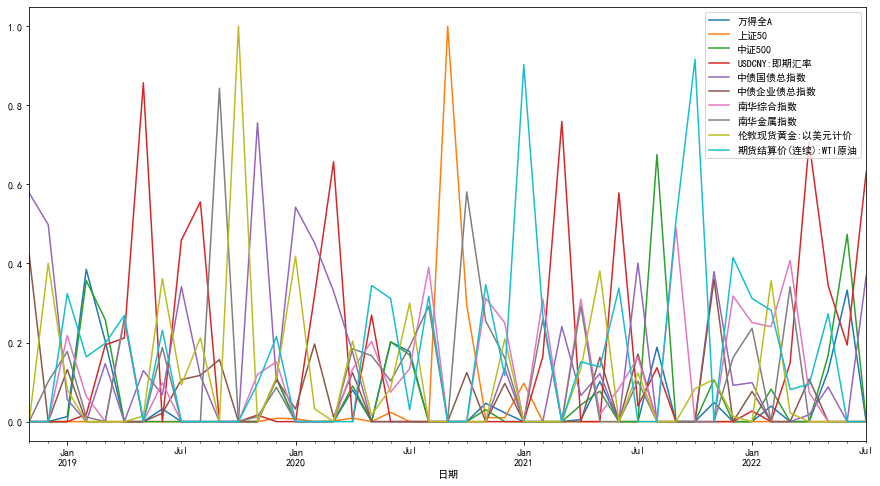

In [6]:
pos = utils_eda.trans_columns_name(port_position)
pos.plot(figsize=(15, 8))

<AxesSubplot:xlabel='日期'>

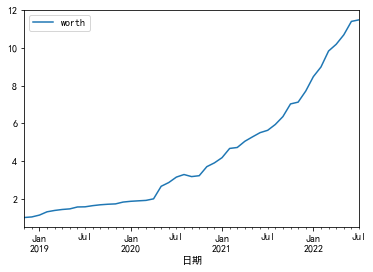

In [7]:
port_worth.plot()

<AxesSubplot:xlabel='日期'>

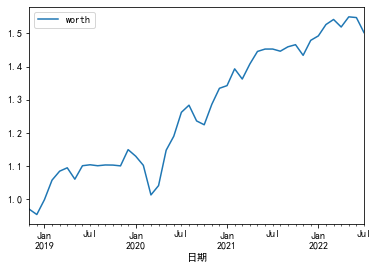

In [8]:
bench0_worth.plot()

In [4]:
imp.reload(utils)

<module 'utils' from 'C:\\Users\\lucid\\Documents\\长江实习\\PyCharmProjects\\topdown\\utils.py'>

In [ ]:
imp.reload(utils.eda)